In [2]:
from keras.callbacks import EarlyStopping,ReduceLROnPlateau,ModelCheckpoint,TensorBoard,LambdaCallback
from keras.layers import Input,Dropout, Dense,GlobalAveragePooling2D
from keras.models import Sequential,Model
from keras.applications.resnet import ResNet50
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf
from tqdm import tqdm
import seaborn as sns
import numpy as np
import itertools 
import datetime

import cv2
import os
import io

In [41]:
import os 

labels = ['glioma', 'meningioma', 'notumor', 'pituitary']

x_train = [] # training images.
y_train  = [] # training labels.
x_test = [] # testing images.
y_test = [] # testing labels.

image_size = 200


for label in labels:
    trainPath = os.path.join('/workspaces/Brain-Tumor-MRI-Classification/Data/Training',label)
    for file in tqdm(os.listdir(trainPath)):
        image = cv2.imread(os.path.join(trainPath, file),0) # load images in gray.
        image = cv2.bilateralFilter(image, 2, 50, 50) # remove images noise.
        image = cv2.applyColorMap(image, cv2.COLORMAP_BONE) # produce a pseudocolored image.
        image = cv2.resize(image, (image_size, image_size)) # resize images into 150*150.
        x_train.append(image)
        y_train.append(labels.index(label))
    
    testPath = os.path.join('/workspaces/Brain-Tumor-MRI-Classification/Data/Testing',label)
    for file in tqdm(os.listdir(testPath)):
        image = cv2.imread(os.path.join(testPath, file),0)
        image = cv2.bilateralFilter(image, 2, 50, 50)
        image = cv2.applyColorMap(image, cv2.COLORMAP_BONE)
        image = cv2.resize(image, (image_size, image_size))
        x_test.append(image)
        y_test.append(labels.index(label))


x_train = np.array(x_train) / 255.0 # normalize Images into range 0 to 1.
x_test = np.array(x_test) / 255.0

print(x_train.shape)
print(x_test.shape)

100%|██████████| 300/300 [00:00<00:00, 434.94it/s]


(5712, 200, 200, 3)
(1311, 200, 200, 3)


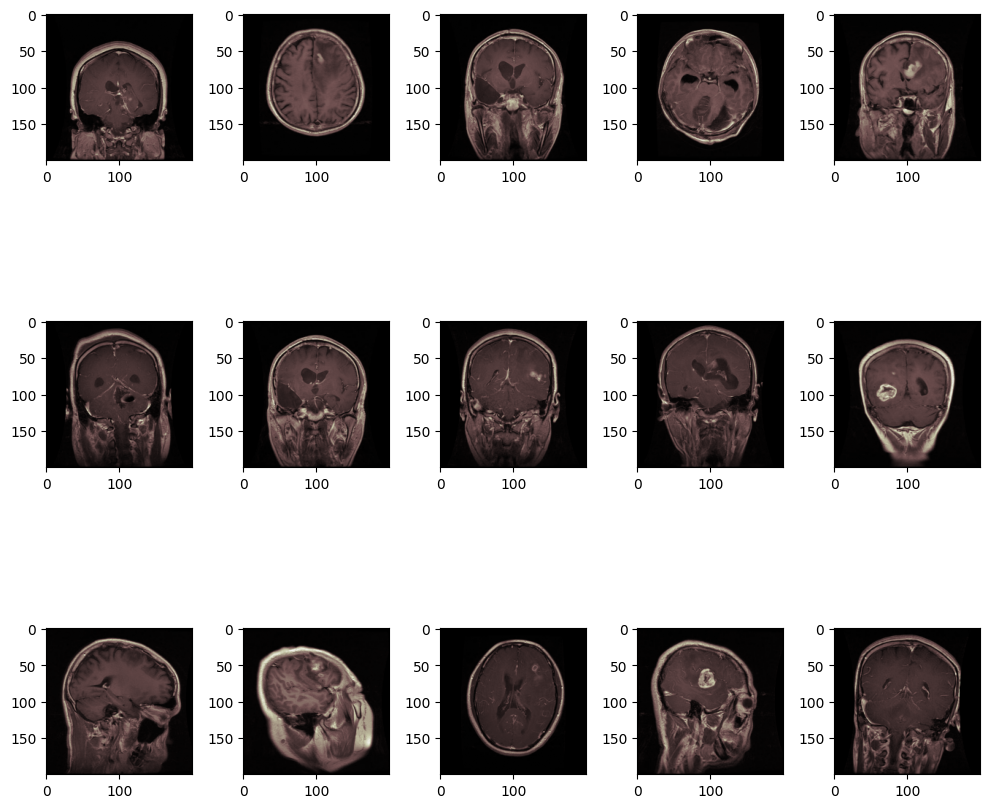

In [42]:
images = [x_train[i] for i in range(15)]
fig, axes = plt.subplots(3, 5, figsize = (10, 10))
axes = axes.flatten()
for img, ax in zip(images, axes):
    ax.imshow(img)
plt.tight_layout()
plt.show()

## Gaussian 

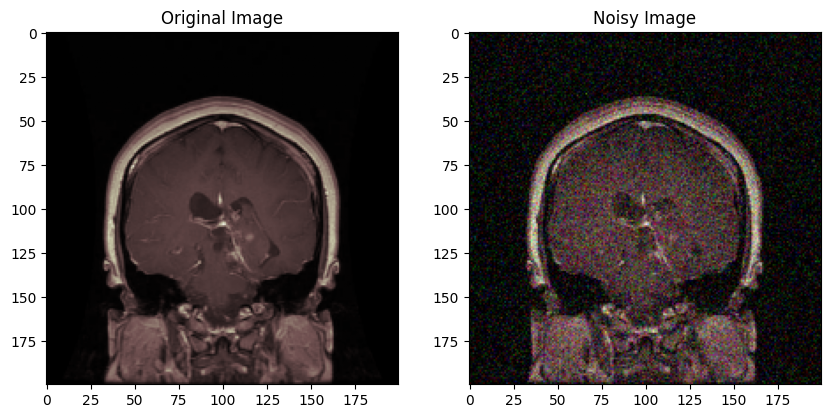

In [74]:
import numpy as np
from matplotlib import pyplot as plt

# Add very little Gaussian noise to the first image in the training set
x_train_noisy = x_train.copy()
x_train_noisy[0] = np.clip(x_train[0] + np.random.normal(loc=0.0, scale=.1, size=x_train[0].shape), 0.0, 1.0)

# Show the original image and the noisy image side by side
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(x_train[0])
axs[0].set_title('Original Image')
axs[1].imshow(x_train_noisy[0])
axs[1].set_title('Noisy Image')
plt.show()


In [78]:
import numpy as np

# Add very little Gaussian noise to the training set
x_train_noisy = x_train.copy()
x_train_noisy = np.clip(x_train_noisy + np.random.normal(loc=0.0, scale=.1, size=x_train_noisy.shape), 0.0, 1.0)

# Add very little Gaussian noise to the test set
x_test_noisy = x_test.copy()
x_test_noisy = np.clip(x_test_noisy + np.random.normal(loc=0.0, scale=.1, size=x_test_noisy.shape), 0.0, 1.0)



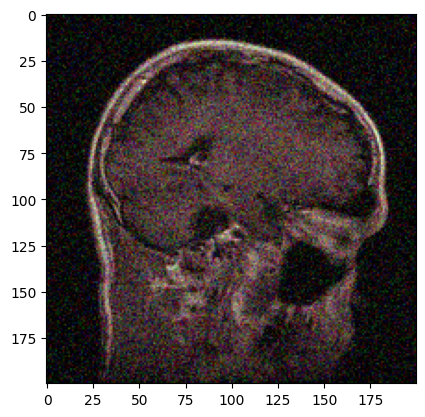

In [79]:
#show the first image in the training set
plt.imshow(x_train_noisy[10])


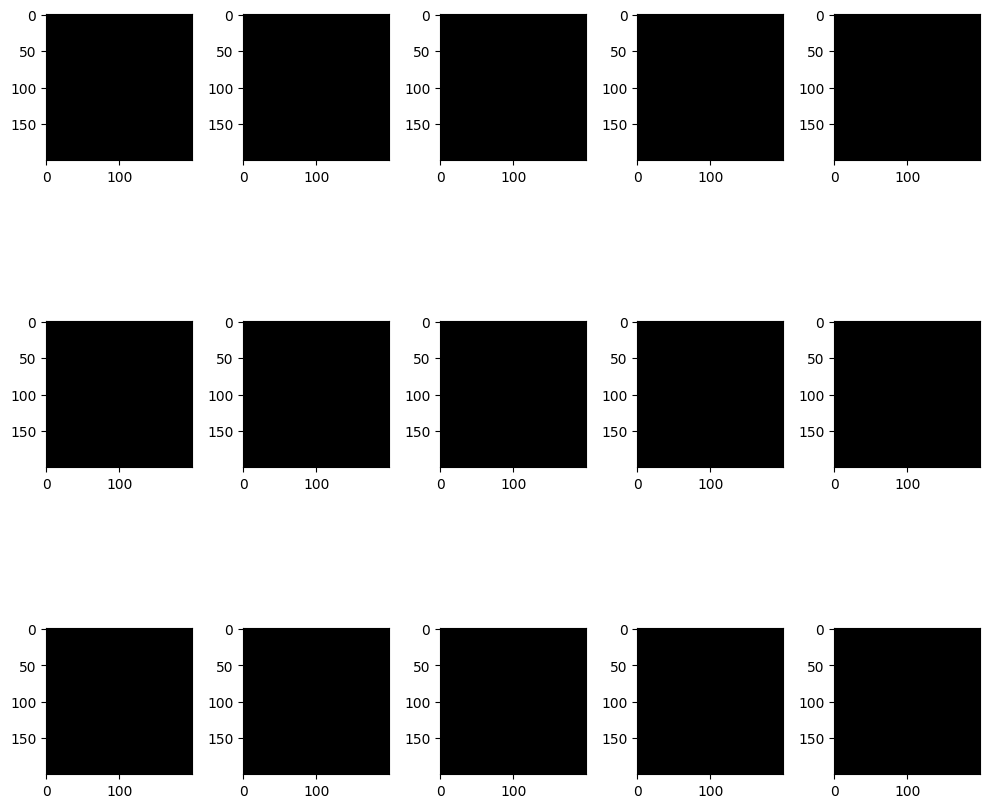

In [64]:
images = [x_train_noisy_gaussain[i] for i in range(15)]
fig, axes = plt.subplots(3, 5, figsize = (10, 10))
axes = axes.flatten()
for img, ax in zip(images, axes):
    ax.imshow(img)
plt.tight_layout()
plt.show()

## Poission Noise

## Quantization Noise